# ScanEat 

Model BMI Prediction using Neural Network & Model Daily Nutritional Intake Prediction using Neural Network 

## Instalation 

In [1]:
# Instalation

# Basic Imports 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import cv2
import pyzbar
from pyzbar.pyzbar import decode

# Machine Learning Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Model BMI Prediction using Neural Network 

##  Data Preprocesing

In [2]:
# Loading Dataset 

file_path = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\bmi.csv"
user_data = pd.read_csv(file_path)

user_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
# Creating BMI as a Continuous Value, counted using formula (weight/(height)**2)

user_data['Height_m'] = user_data['Height']/ 100 # converting height from cm to meters
user_data['Gender'] = user_data['Gender'].map({'Male' : 1, 'Female': 0}) # Map Gender column to binary values:'Male: 1', 'Female: 0'
user_data['BMI'] = user_data['Weight'] / (user_data['Height_m']**2)


user_data.head()

,Gender,Height,Weight,Index,Height_m,BMI
0,1,174,96,4,1.74,31.708284
1,1,189,87,2,1.89,24.355421
2,0,185,110,4,1.85,32.140248
3,0,195,104,3,1.95,27.350427
4,1,149,61,3,1.49,27.476240


## Generating Model for BMI Prediction

### Defining Features 

In [4]:
# Defining Features 

X = user_data[["Gender", "Height", "Weight"]].values
y = user_data['BMI'].values

# Split the data into training, validation, and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the input features 

scaler_BMI = StandardScaler()
X_train = scaler_BMI.fit_transform(X_train)
X_val = scaler_BMI.transform(X_val)
X_test = scaler_BMI.transform(X_test)

# Export the scaler to a file
scaler_file = 'scaler_BMI.pkl'
with open(scaler_file, 'wb') as file:
    pickle.dump(scaler_BMI, file)

print(f"Scaler saved to {scaler_file}")

Scaler saved to scaler_BMI.pkl


### Defining The Neural Network 


In [5]:
# Definining The Neural Network Model 

model_BMI = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1)
])

model_BMI.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model_BMI.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,737 (49.75 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 0 (0.00 B)

### Training The Model 

In [6]:
# Train The Model 

history_BMI = model_BMI.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val),
    epochs = 50, 
    batch_size=32, 
    verbose=1
)

# Evaluate the model on the test set 

test_loss, test_mae = model_BMI.evaluate(X_test, y_test, verbose=1)

# Make a prediction on the test 

y_pred = model_BMI.predict(X_test)

# Display test MAE 

print("Test MAE:", test_mae)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1626.5383 - mae: 37.7619 - val_loss: 1681.0621 - val_mae: 37.9607
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1505.3972 - mae: 36.3436 - val_loss: 1594.0964 - val_mae: 36.7868
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1412.4469 - mae: 35.0477 - val_loss: 1421.9082 - val_mae: 34.3767
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1310.7104 - mae: 33.3494 - val_loss: 1103.9874 - val_mae: 29.4619
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 960.6198 - mae: 27.6177 - val_loss: 643.3029 - val_mae: 20.8940
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 472.2811 - mae: 18.4374 - val_loss: 229.1587 - val_mae: 12.8258
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 158.7187 - mae: 10.3772 - val_loss: 88.2323 - val_mae: 7.7715
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 86.1715 - mae: 7.1373 - val_loss: 42.0336 - val_mae: 5.3373
Epoch 9/50
11/11 ━━

### Visualizing Training Data

In [7]:
# Checking the Actual BMI and the model counted BMI 

# Comparing the value for the manual calculated BMI with the age weighted BMI prediction 

y_pred = y_pred.flatten()

comparison_BMI = pd.DataFrame({
    'Actual BMI': y_test, 
    'Predicted BMI': y_pred
})

# Error (Difference): 

comparison_BMI['Error'] = comparison_BMI['Actual BMI'] - comparison_BMI['Predicted BMI']
print(comparison_BMI.head())

   Actual BMI  Predicted BMI     Error
0   30.407627      29.927227  0.480400
1   28.010412      27.217615  0.792797
2   48.789642      48.673744  0.115897
3   24.857955      24.230999  0.626956
4   52.437642      52.956509 -0.518867


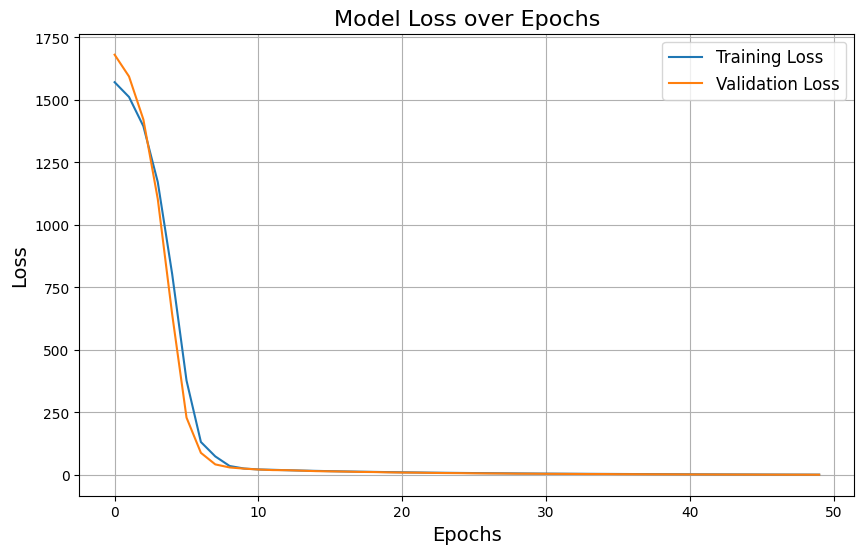

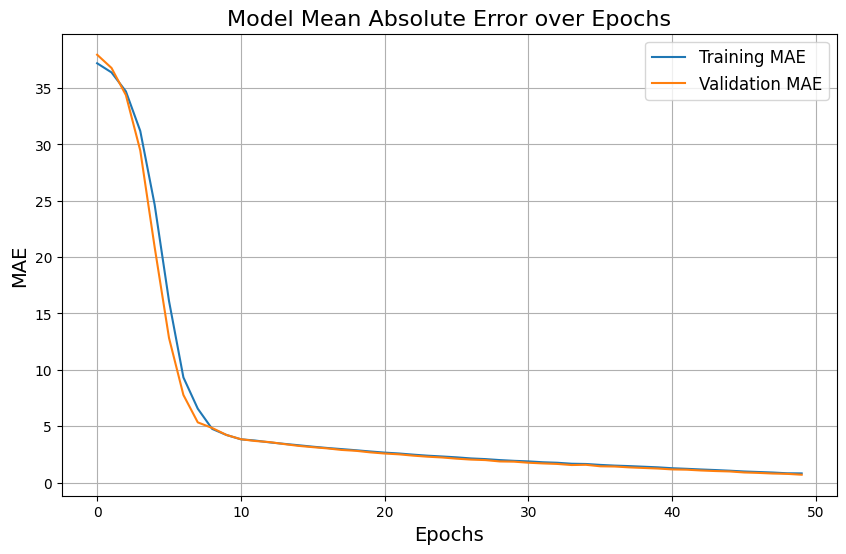

In [8]:
# Visualizing Data 

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_BMI.history['loss'], label='Training Loss')
plt.plot(history_BMI.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot training and validation MAE 
if 'mae' in history_BMI.history and 'val_mae' in history_BMI.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history_BMI.history['mae'], label='Training MAE')
    plt.plot(history_BMI.history['val_mae'], label='Validation MAE')
    plt.title('Model Mean Absolute Error over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('MAE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    


### Saving The Model 

In [9]:
# Saving the Model 

model_BMI.save('Model_BMI.h5')

## Getting Information from the trained model_BMI

In [10]:
# Getting Status for the BMI 

def get_BMI_status(y_pred): 
    if y_pred < 18.5: 
        return "Underweight" 
    elif 18.5 <= y_pred < 24.9: 
        return "Healthy Weight"
    elif 25 <= y_pred < 29.9: 
        return "Overweight"
    elif 30 <= y_pred < 34.9: 
        return "Class 1 Obesity"
    elif 35 <= y_pred < 39.9: 
        return "Class 2 Obesity"
    else: 
        return "Class 3 Obesity"

In [11]:
# Getting theh full user data

user_data['Sex'] = user_data["Gender"]
user_data['Height'] = user_data["Height_m"]
user_data['Weight'] = user_data["Weight"]
user_data['Actual BMI'] = comparison_BMI['Actual BMI']
user_data['Predicted BMI'] = comparison_BMI['Predicted BMI']
user_data['BMI Status'] = comparison_BMI['Predicted BMI'].apply(get_BMI_status)

columns_to_display = ['Gender', 'Height', 'Weight', 'Actual BMI', 'Predicted BMI', 'BMI Status']
compiled_user_data = user_data[columns_to_display]
print(compiled_user_data.head())


   Gender  Height  Weight  Actual BMI  Predicted BMI       BMI Status
0       1    1.74      96   30.407627      29.927227  Class 3 Obesity
1       1    1.89      87   28.010412      27.217615       Overweight
2       0    1.85     110   48.789642      48.673744  Class 3 Obesity
3       0    1.95     104   24.857955      24.230999   Healthy Weight
4       1    1.49      61   52.437642      52.956509  Class 3 Obesity


# Model Daily Nutritional Intake Prediction using Neural Network 

## Data Preprocessing

In [12]:
# Loading Dataset 

file_path_nutr = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\nutritional intake.csv"
nutr_data = pd.read_csv(file_path_nutr)
nutr_data['Sex'] = nutr_data['gender'].map({'Male' : 1, 'Female': 0,}).astype(float)  # Map Gender column to binary values:'Male: 1', 'Female: 0'
nutr_data = nutr_data[nutr_data['age'] >= 10]

# Reset index (optional, if you want a clean index after filtering)
nutr_data.reset_index(drop=True, inplace=True)

nutr_data.head()

,gender,age,bmi,Sex
0,Female,80.0,25.19,0.0
1,Female,54.0,27.32,0.0
2,Male,28.0,27.32,1.0
3,Female,36.0,23.45,0.0
4,Male,76.0,20.14,1.0


### Geting Daily Nutritional Intake for Population from Permenkes RI No 28 Tahun 2019 tentang Angka Kecukupan Gizi yang Dianjurkan Untuk Masyarakat Indonesia

#### Counting Total Calories Intake 

In [13]:
# Function to calculate total calories
def total_calories(row): 
    base_sex = row['Sex']
    base_age = row['age']

    if base_sex == 1.0 and base_age in range(10, 13): 
        return 2000
    elif base_sex == 1.0 and base_age in range(13, 16): 
        return 2400
    elif base_sex == 1.0 and base_age in range(16, 19): 
        return 2650
    elif base_sex == 1.0 and base_age in range(19, 30): 
        return 2650
    elif base_sex == 1.0 and base_age in range(29, 50): 
        return 2550
    elif base_sex == 1.0 and base_age in range(50, 65): 
        return 2150
    elif base_sex == 1.0 and base_age in range(65, 80): 
        return 1800
    elif base_sex == 1.0 and base_age >= 80: 
        return 1600
    elif base_sex == 0.0 and base_age in range(10, 13): 
        return 1900
    elif base_sex == 0.0 and base_age in range(13, 16): 
        return 2050
    elif base_sex == 0.0 and base_age in range(16, 19): 
        return 2100
    elif base_sex == 0.0 and base_age in range(19, 30): 
        return 2250
    elif base_sex == 0.0 and base_age in range(29, 50): 
        return 2150
    elif base_sex == 0.0 and base_age in range(50, 65): 
        return 1800
    elif base_sex == 0.0 and base_age in range(65, 80): 
        return 1550
    elif base_sex == 0.0 and base_age >= 80: 
        return 1400
    return None

# Apply the function row-wise
nutr_data['Total Energy (kkal)'] = nutr_data.apply(total_calories, axis=1)

# Display the updated DataFrame
print(nutr_data.head())


   gender   age    bmi  Sex  Total Energy (kkal)
0  Female  80.0  25.19  0.0               1400.0
1  Female  54.0  27.32  0.0               1800.0
2    Male  28.0  27.32  1.0               2650.0
3  Female  36.0  23.45  0.0               2150.0
4    Male  76.0  20.14  1.0               1800.0


#### Counting Total Fat Intake 

In [14]:
# Defining The FFS Intake 

def total_fat(row): 
    base_sex = row['Sex']
    base_age = row['age']

    if base_sex == 1.0 and base_age in range(10, 13): 
        return 65
    elif base_sex == 1.0 and base_age in range(13, 16): 
        return 80
    elif base_sex == 1.0 and base_age in range(16, 19): 
        return 85
    elif base_sex == 1.0 and base_age in range(19, 30): 
        return 75
    elif base_sex == 1.0 and base_age in range(29, 50): 
        return 70
    elif base_sex == 1.0 and base_age in range(50, 65): 
        return 60
    elif base_sex == 1.0 and base_age in range(65, 80): 
        return 50
    elif base_sex == 1.0 and base_age >= 80: 
        return 45
    elif base_sex == 0.0 and base_age in range(10, 13): 
        return 65
    elif base_sex == 0.0 and base_age in range(13, 16): 
        return 70
    elif base_sex == 0.0 and base_age in range(16, 19): 
        return 70
    elif base_sex == 0.0 and base_age in range(19, 30): 
        return 65
    elif base_sex == 0.0 and base_age in range(29, 50): 
        return 60
    elif base_sex == 0.0 and base_age in range(50, 65): 
        return 60
    elif base_sex == 0.0 and base_age in range(65, 80): 
        return 58
    elif base_sex == 0.0 and base_age >= 80: 
        return 58
    return None

# Apply the function row-wise
nutr_data['Total Fat (g)'] = nutr_data.apply(total_fat, axis=1)

# Display the updated DataFrame
print(nutr_data.head())

   gender   age    bmi  Sex  Total Energy (kkal)  Total Fat (g)
0  Female  80.0  25.19  0.0               1400.0           58.0
1  Female  54.0  27.32  0.0               1800.0           60.0
2    Male  28.0  27.32  1.0               2650.0           75.0
3  Female  36.0  23.45  0.0               2150.0           60.0
4    Male  76.0  20.14  1.0               1800.0           50.0


#### Counting Total Sodium Intake

In [15]:
def total_sodium(row): 
    base_sex = row['Sex']
    base_age = row['age']

    if base_sex == 1.0 and base_age in range(10, 13): 
        return 1300
    elif base_sex == 1.0 and base_age in range(13, 16): 
        return 1500
    elif base_sex == 1.0 and base_age in range(16, 19): 
        return 1700
    elif base_sex == 1.0 and base_age in range(19, 30): 
        return 1500
    elif base_sex == 1.0 and base_age in range(29, 50): 
        return 1300
    elif base_sex == 1.0 and base_age in range(50, 65): 
        return 1100
    elif base_sex == 1.0 and base_age in range(65, 80): 
        return 1100
    elif base_sex == 1.0 and base_age >= 80: 
        return 1000
    elif base_sex == 0.0 and base_age in range(10, 13): 
        return 1400
    elif base_sex == 0.0 and base_age in range(13, 16): 
        return 1500
    elif base_sex == 0.0 and base_age in range(16, 19): 
        return 1600
    elif base_sex == 0.0 and base_age in range(19, 30): 
        return 1500
    elif base_sex == 0.0 and base_age in range(29, 50): 
        return 1500
    elif base_sex == 0.0 and base_age in range(50, 65): 
        return 1400
    elif base_sex == 0.0 and base_age in range(65, 80): 
        return 1200
    elif base_sex == 0.0 and base_age >= 80: 
        return 1000
    return None

# Apply the function row-wise
nutr_data['Total Sodium (mg)'] = nutr_data.apply(total_sodium, axis=1)

# Display the updated DataFrame
print(nutr_data.head())

   gender   age    bmi  Sex  Total Energy (kkal)  Total Fat (g)  \
0  Female  80.0  25.19  0.0               1400.0           58.0   
1  Female  54.0  27.32  0.0               1800.0           60.0   
2    Male  28.0  27.32  1.0               2650.0           75.0   
3  Female  36.0  23.45  0.0               2150.0           60.0   
4    Male  76.0  20.14  1.0               1800.0           50.0   

   Total Sodium (mg)  
0             1000.0  
1             1400.0  
2             1500.0  
3             1500.0  
4             1100.0  


#### Counting Total Sugar Intake

In [16]:
# Calculate total sugar intake in grams
def calculate_sugar_intake(row):
    total_calories = row['Total Energy (kkal)']  
    sugar_kcal = total_calories * 0.10  # 10% of total calorie intake
    sugar_grams = sugar_kcal / 4  # Convert kcal to grams (1 g sugar = 4 kcal)
    return sugar_grams

# Apply the function to calculate sugar intake
nutr_data['Total Sugar (g)'] = nutr_data.apply(calculate_sugar_intake, axis=1)

# Display the updated DataFrame
print(nutr_data.head())


   gender   age    bmi  Sex  Total Energy (kkal)  Total Fat (g)  \
0  Female  80.0  25.19  0.0               1400.0           58.0   
1  Female  54.0  27.32  0.0               1800.0           60.0   
2    Male  28.0  27.32  1.0               2650.0           75.0   
3  Female  36.0  23.45  0.0               2150.0           60.0   
4    Male  76.0  20.14  1.0               1800.0           50.0   

   Total Sodium (mg)  Total Sugar (g)  
0             1000.0            35.00  
1             1400.0            45.00  
2             1500.0            66.25  
3             1500.0            53.75  
4             1100.0            45.00  


### Deleting the Row containing NaN value

In [17]:
nutr_data.head()

# Drop rows with any missing values
nutr_data = nutr_data.dropna()

# Reset the index for a clean DataFrame
nutr_data.reset_index(drop=True, inplace=True)


## Generating Model for Total Daily Calorie Intake

### Defining Features


In [18]:
# Defining Features 

X = nutr_data[["Sex", "age", "bmi"]].values
y = nutr_data["Total Energy (kkal)"].values

# Split the data into training, validation, and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the input features 

scaler_kcal = StandardScaler()
X_train = scaler_kcal.fit_transform(X_train)
X_val = scaler_kcal.transform(X_val)
X_test = scaler_kcal.transform(X_test)

# Export the scaler to a file
scaler_file = 'scaler_kcal.pkl'
with open(scaler_file, 'wb') as file:
    pickle.dump(scaler_kcal, file)

print(f"Scaler saved to {scaler_file}")

Scaler saved to scaler_kcal.pkl


### Defining The Neural Network

In [49]:
# Defining The Neural Network 

model_kcal = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_kcal.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model_kcal.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105 (90.25 KB)

 Trainable params: 23,105 (90.25 KB)

 Non-trainable params: 0 (0.00 B)

### Training The Model 

In [52]:
# Train The Model 

history_kcal = model_kcal.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val),
    epochs = 50, 
    batch_size=128, 
    verbose=1
)

# Evaluate the model on the test set 

test_loss, test_mae = model_kcal.evaluate(X_test, y_test, verbose=1)

# Make a prediction on the test 

y_pred = model_kcal.predict(X_test)

# Display test MAE and the first few prediction 

print("Test MAE:", test_mae)



Epoch 1/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 452.7222 - mae: 14.6903 - val_loss: 722.0422 - val_mae: 20.9371
Epoch 2/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 515.7198 - mae: 15.9877 - val_loss: 230.6680 - val_mae: 7.7474
Epoch 3/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 433.7227 - mae: 14.2871 - val_loss: 470.6180 - val_mae: 15.7299
Epoch 4/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 452.4422 - mae: 14.6833 - val_loss: 266.0517 - val_mae: 9.8392
Epoch 5/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 624.8301 - mae: 16.4565 - val_loss: 327.5125 - val_mae: 13.0978
Epoch 6/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 426.3614 - mae: 14.5862 - val_loss: 285.5796 - val_mae: 10.7810
Epoch 7/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 390.9951 - mae: 13.4196 - val_loss: 1215.6738 - val_mae: 28.9831
Epoch 8/50
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 602.0012 - mae: 17.7695 - val_loss: 432.0227 - val_mae: 15.7401
Epoch 9/5

### Visualizing The Training Data

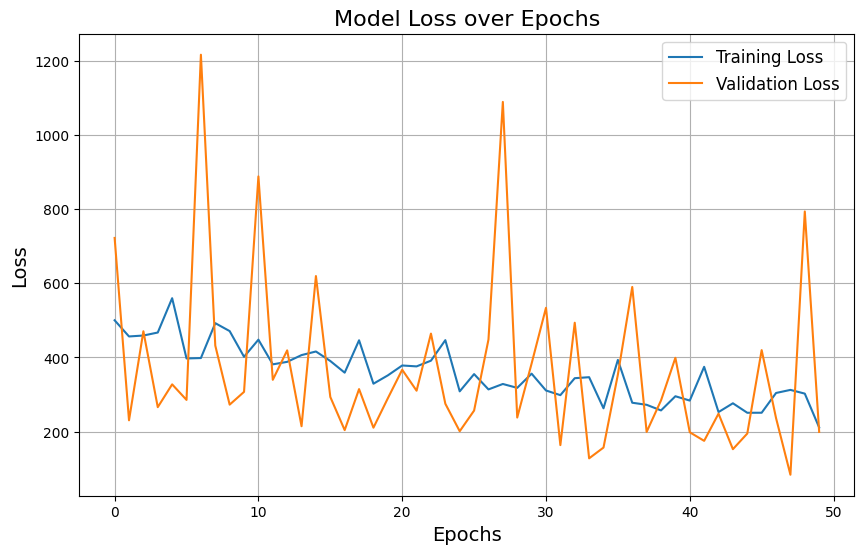

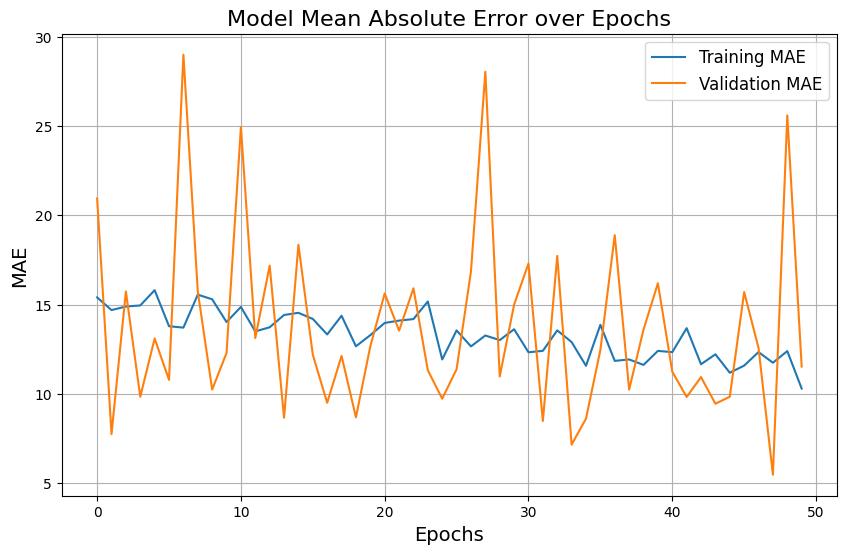

In [53]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_kcal.history['loss'], label='Training Loss')
plt.plot(history_kcal.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot training and validation MAE 
if 'mae' in history_kcal.history and 'val_mae' in history_BMI.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history_kcal.history['mae'], label='Training MAE')
    plt.plot(history_kcal.history['val_mae'], label='Validation MAE')
    plt.title('Model Mean Absolute Error over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('MAE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    


### Saving The Model 

In [54]:
# Saving the Model 

model_kcal.save('Model_kcal.h5')

## Generating Model for Total Daily Sugar Intake

### Defining Features

In [55]:
# Defining Features 

X = nutr_data[["Sex", "age", "bmi"]].values
y = nutr_data["Total Sugar (g)"].values

# Split the data into training, validation, and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the input features 

scaler_sugar = StandardScaler()
X_train = scaler_sugar.fit_transform(X_train)
X_val = scaler_sugar.transform(X_val)
X_test = scaler_sugar.transform(X_test)

# Export the scaler to a file
scaler_file = 'scaler_sugar.pkl'
with open(scaler_file, 'wb') as file:
    pickle.dump(scaler_sugar, file)

print(f"Scaler saved to {scaler_file}")

Scaler saved to scaler_sugar.pkl


### Defining The Neural Network 

In [56]:
# Defining The Neural Network 

model_sugar = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_sugar.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model_sugar.summary()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,737 (49.75 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 0 (0.00 B)

### Training The Model 

In [57]:
# Train The Model 

history_sugar = model_kcal.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val),
    epochs = 25, 
    batch_size=32, 
    verbose=1
)

# Evaluate the model on the test set 

test_loss, test_mae = model_sugar.evaluate(X_test, y_test, verbose=1)

# Make a prediction on the test 

y_pred = model_sugar.predict(X_test)

# Display test MAE and the first few prediction 

print("Test MAE:", test_mae)

Epoch 1/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 24613.8242 - mae: 19.2759 - val_loss: 2.0744 - val_mae: 1.0487
Epoch 2/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0739 - mae: 1.0228 - val_loss: 1.5735 - val_mae: 0.8763
Epoch 3/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8489 - mae: 0.9502 - val_loss: 1.4194 - val_mae: 0.8230
Epoch 4/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5633 - mae: 0.8644 - val_loss: 1.2608 - val_mae: 0.7879
Epoch 5/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2751 - mae: 0.7735 - val_loss: 1.1048 - val_mae: 0.7073
Epoch 6/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0332 - mae: 0.6843 - val_loss: 0.7671 - val_mae: 0.5534
Epoch 7/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8252 - mae: 0.5997 - val_loss: 0.6092 - val_mae: 0.5884
Epoch 8/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6711 - mae: 0.5382 - val_loss: 0.5330 - val_mae: 0.4664
Epoch 9/25
1974/1974 ━━━━━━━━━━━━━━

### Visualizing The Training Data

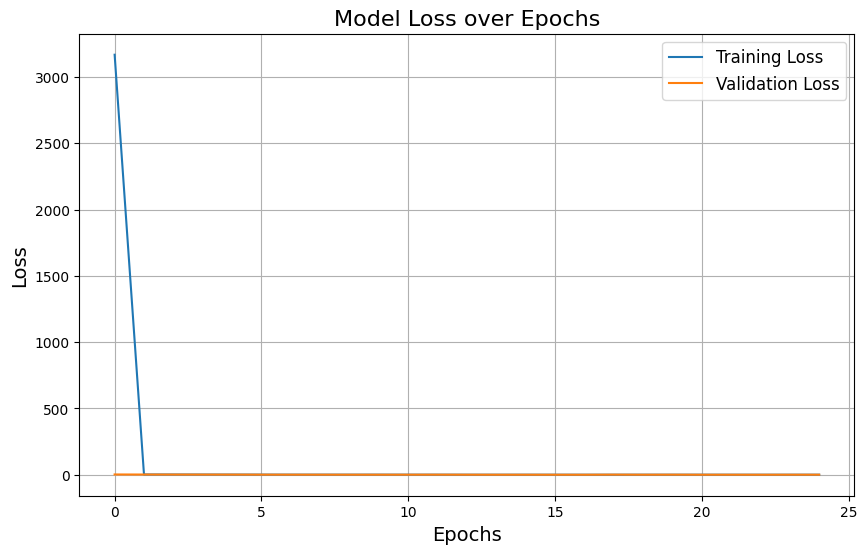

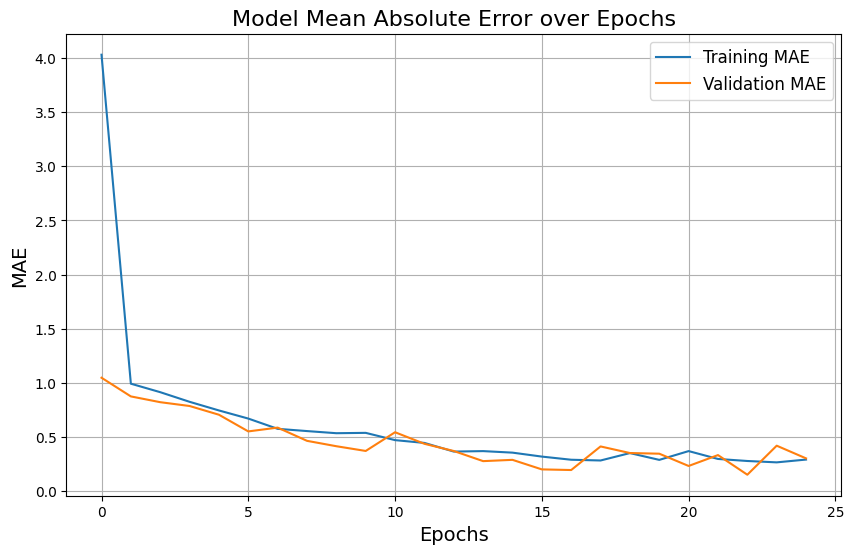

In [82]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_sugar.history['loss'], label='Training Loss')
plt.plot(history_sugar.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot training and validation MAE 
if 'mae' in history_sugar.history and 'val_mae' in history_BMI.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history_sugar.history['mae'], label='Training MAE')
    plt.plot(history_sugar.history['val_mae'], label='Validation MAE')
    plt.title('Model Mean Absolute Error over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('MAE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    


### Saving The Model 

In [59]:
# Saving the Model 

model_sugar.save('Model_sugar.h5')

## Generating Model for Total Daily Sodium Intake

### Defining Features

In [60]:
# Defining Features 

X = nutr_data[["Sex", "age", "bmi"]].values
y = nutr_data["Total Sodium (mg)"].values

# Split the data into training, validation, and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the input features 

scaler_sodium = StandardScaler()
X_train = scaler_sodium.fit_transform(X_train)
X_val = scaler_sodium.transform(X_val)
X_test = scaler_sodium.transform(X_test)

# Export the scaler to a file
scaler_file = 'scaler_sodium.pkl'
with open(scaler_file, 'wb') as file:
    pickle.dump(scaler_sodium, file)

print(f"Scaler saved to {scaler_file}")

Scaler saved to scaler_sodium.pkl


### Defining The Neural Network 

In [79]:
# Defining The Neural Network 

model_sodium = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_sodium.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model_sodium.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,737 (49.75 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 0 (0.00 B)

### Training The Model 

In [80]:
# Train The Model 

history_sodium = model_kcal.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val),
    epochs = 25, 
    batch_size=128, 
    verbose=1
)

# Evaluate the model on the test set 

test_loss, test_mae = model_sodium.evaluate(X_test, y_test, verbose=1)

# Make a prediction on the test 

y_pred = model_sodium.predict(X_test)

# Display test MAE and the first few prediction 

print("Test MAE:", test_mae, )

Epoch 1/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 127.9005 - mae: 4.7753 - val_loss: 139.3218 - val_mae: 5.7192
Epoch 2/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 129.5899 - mae: 4.8241 - val_loss: 117.1657 - val_mae: 4.4243
Epoch 3/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 118.6675 - mae: 4.1814 - val_loss: 128.4915 - val_mae: 4.0057
Epoch 4/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 117.1486 - mae: 4.4131 - val_loss: 122.3342 - val_mae: 4.1129
Epoch 5/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 112.8586 - mae: 4.0658 - val_loss: 118.1050 - val_mae: 3.0806
Epoch 6/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 121.0182 - mae: 4.6197 - val_loss: 147.4696 - val_mae: 4.6926
Epoch 7/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 115.1295 - mae: 4.2347 - val_loss: 122.7758 - val_mae: 3.6175
Epoch 8/25
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 121.8178 - mae: 4.4056 - val_loss: 124.9710 - val_mae: 4.0699
Epoch 9/25
494/494 ━━━━━

### Visualizing The Training Data

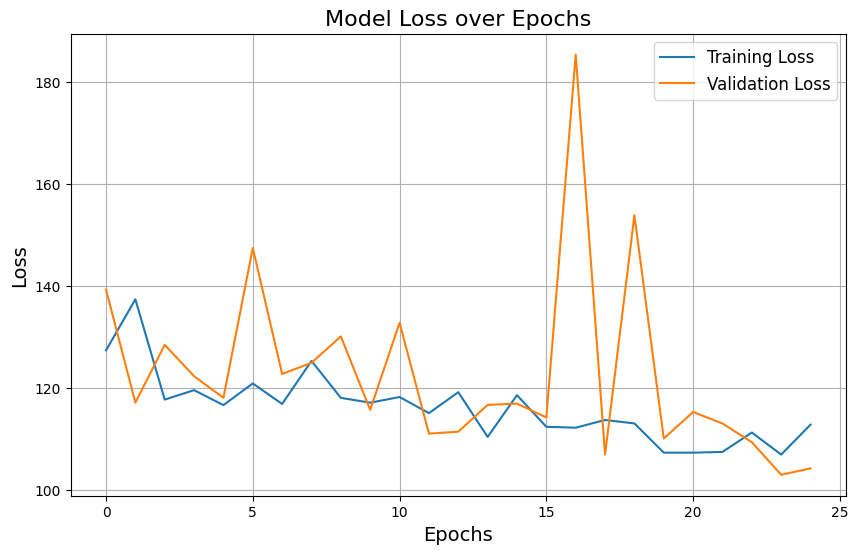

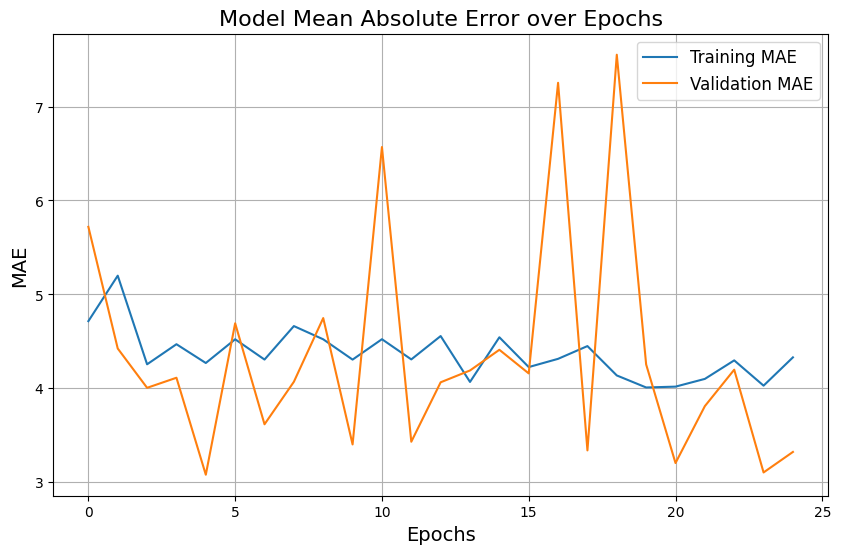

In [81]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_sodium.history['loss'], label='Training Loss')
plt.plot(history_sodium.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot training and validation MAE 
if 'mae' in history_sodium.history and 'val_mae' in history_BMI.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history_sodium.history['mae'], label='Training MAE')
    plt.plot(history_sodium.history['val_mae'], label='Validation MAE')
    plt.title('Model Mean Absolute Error over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('MAE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    


### Saving The Model 

In [88]:
# Saving the Model 

model_sodium.save('Model_sodium.h5')

## Generating Model for Total Daily Fat Intake

### Defining Features

In [83]:
# Defining Features 

X = nutr_data[["Sex", "age", "bmi"]].values
y = nutr_data['Total Fat (g)'].values

# Split the data into training, validation, and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the input features 

scaler_fat = StandardScaler()
X_train = scaler_fat.fit_transform(X_train)
X_val = scaler_fat.transform(X_val)
X_test = scaler_fat.transform(X_test)

# Export the scaler to a file
scaler_file = 'scaler_fat.pkl'
with open(scaler_file, 'wb') as file:
    pickle.dump(scaler_fat, file)

print(f"Scaler saved to {scaler_file}")

Scaler saved to scaler_fat.pkl


### Defining The Neural Network 

In [84]:
# Defining The Neural Network 

model_fat = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_fat.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model_fat.summary()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,737 (49.75 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 0 (0.00 B)

### Training The Model

In [85]:
# Train The Model 

history_fat = model_kcal.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val),
    epochs = 25, 
    batch_size=32, 
    verbose=1
)

# Evaluate the model on the test set 

test_loss, test_mae = model_fat.evaluate(X_test, y_test, verbose=1)

# Make a prediction on the test 

y_pred = model_fat.predict(X_test)

# Display test MAE and the first few prediction 

print("Test MAE:", test_mae)

Epoch 1/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 25844.4707 - mae: 34.8004 - val_loss: 12.7489 - val_mae: 2.3241
Epoch 2/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9.6768 - mae: 2.0302 - val_loss: 5.4034 - val_mae: 1.4373
Epoch 3/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.1403 - mae: 1.3986 - val_loss: 3.7320 - val_mae: 1.2462
Epoch 4/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.9471 - mae: 1.1164 - val_loss: 2.1219 - val_mae: 0.9029
Epoch 5/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.9640 - mae: 0.8722 - val_loss: 1.4289 - val_mae: 0.7465
Epoch 6/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4008 - mae: 0.7220 - val_loss: 0.9994 - val_mae: 0.6453
Epoch 7/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0636 - mae: 0.6078 - val_loss: 1.7636 - val_mae: 0.8546
Epoch 8/25
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9935 - mae: 0.5857 - val_loss: 0.8816 - val_mae: 0.4877
Epoch 9/25
1974/1974 ━━━━━━━━━━━━━

### Visualizing The Training Data

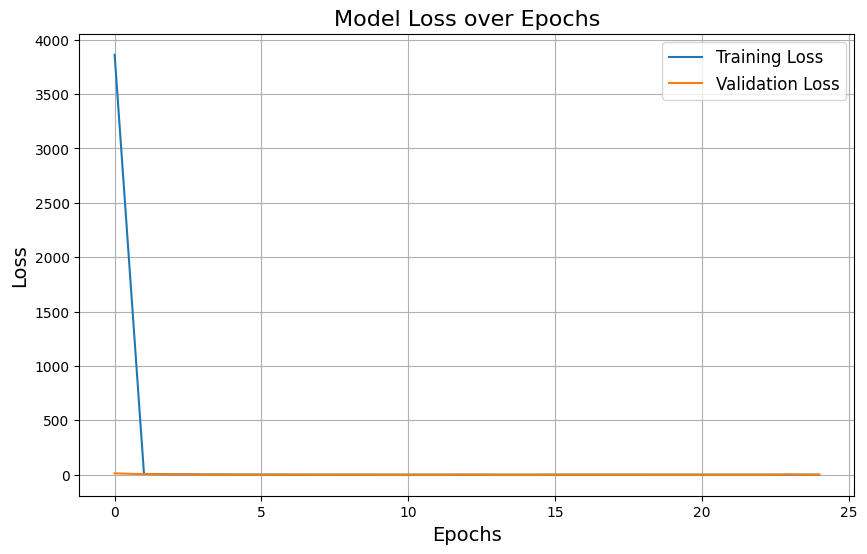

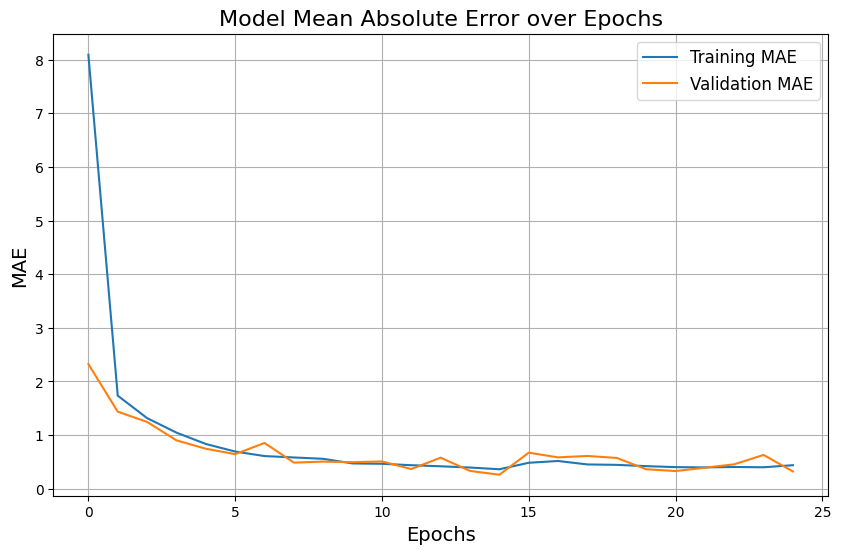

In [86]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_fat.history['loss'], label='Training Loss')
plt.plot(history_fat.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot training and validation MAE 
if 'mae' in history_fat.history and 'val_mae' in history_BMI.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history_fat.history['mae'], label='Training MAE')
    plt.plot(history_fat.history['val_mae'], label='Validation MAE')
    plt.title('Model Mean Absolute Error over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('MAE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    


### Saving The Model 

In [87]:
# Saving the Model 

model_sodium.save('Model_fat.h5')

# Connect The Dot 

##### Connecting the model with the barcode reader to generate personalized information based on the product scanned

## Define The Predicting Function 


In [ ]:
# Function to load the model and scaler, then make predictions
def load_model_and_predict(input_data, model_path, scaler_path):
    # Load the pre-trained model
    model = tf.keras.models.load_model(model_path)
    
    # Load the scaler
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    
    # Scale the input data
    scaled_data = scaler.transform(input_data)
    
    # Make predictions
    predictions = model.predict(scaled_data)
    return predictions

# Function for BMI prediction

def predict_BMI(Weight, Height, Sex):
    input_data_BMI = np.array([[Sex, Height, Weight]]) # Sex: 1 for male, 0 for female
    model_path_BMI = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\Model_BMI.h5"
    scaler_path_BMI = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\scaler_BMI.pkl"
    
    # Get BMI prediction 
    
    bmi_prediction = load_model_and_predict(input_data_BMI, model_path_BMI, scaler_path_BMI)[0][0]
    return bmi_prediction

def predict_kcal(bmi_prediction, Sex, Age):
    input_data_kcal = np.array([[Sex, Age, bmi_prediction]]) # Sex: 1 for male, 0 for female
    model_path_kcal = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\Model_kcal.h5"
    scaler_path_kcal = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\scaler_kcal.pkl"
    
    # Get total daily calories intake prediction 
    
    kcal_prediction = load_model_and_predict(input_data_kcal, model_path_kcal, scaler_path_kcal)[0][0]
    return kcal_prediction

def predict_sugar(bmi_prediction, Sex, Age):
    input_data_sugar = np.array([[Sex, Age, bmi_prediction]]) # Sex: 1 for male, 0 for female
    model_path_sugar = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\Model_sugar.h5"
    scaler_path_sugar = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\scaler_sugar.pkl"
    
    # Get total daily sugar intake prediction 
    
    sugar_prediction = load_model_and_predict(input_data_sugar, model_path_sugar, scaler_path_sugar)[0][0]
    return sugar_prediction
    
def predict_sodium(bmi_prediction, Sex, Age):
    input_data_sodium = np.array([[Sex, Age, bmi_prediction]]) # Sex: 1 for male, 0 for female
    model_path_sodium = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\Model_sodium.h5"
    scaler_path_sodium = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\scaler_sodium.pkl"
    
    # Get total daily sodium intake prediction 
    
    sodium_prediction = load_model_and_predict(input_data_sodium, model_path_sodium, scaler_path_sodium)[0][0]
    return sodium_prediction

def predict_fat(bmi_prediction, Sex, Age):
    input_data_fat = np.array([[Sex, Age, bmi_prediction]]) # Sex: 1 for male, 0 for female
    model_path_fat = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\Model_fat.h5"
    scaler_path_fat = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\scaler_fat.pkl"
    
    # Get total daily sodium intake prediction 
    
    sodium_prediction = load_model_and_predict(input_data_fat, model_path_fat, scaler_path_fat)[0][0]
    return sodium_prediction


# Compiling all health metrics 

def predict_health_metrics(Weight, Height, Sex, Age): 
    bmi_prediction = predict_BMI(Weight, Height, Sex)
    BMI_status = get_BMI_status(bmi_prediction)
    kcal_prediction = predict_kcal(bmi_prediction, Age, Sex)
    sugar_prediction = predict_sugar(bmi_prediction, Age, Sex)
    sodium_prediction = predict_sodium(bmi_prediction, Age, Sex)
    fat_prediction = predict_fat(bmi_prediction, Age, Sex)
    
    print("Body Mass Index Anda: " + str(bmi_prediction) + ", dengan status Body Mass Index: " + BMI_status)
    print("Total Kalori yang Anda butuhkan dalam satu hari sebesar: " + str(kcal_prediction) + " kcal")
    print("Total Konsumsi Gula maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: " + str(sugar_prediction*100) + ' g')
    print("Total Konsumsi Garam maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: " + str(sodium_prediction) + ' g')
    print("Total Konsumsi Lemak maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: " + str(fat_prediction*100) + ' mg')  



In [115]:
# Example: User inputs height, weight, sex, and age
Height = 170  # m
Weight = 70   # kg
Sex = 1       # Male (1 for male, 0 for female)
Age = 30      # years

# Call the function to predict health metrics
predict_health_metrics(Weight, Height, Sex, Age)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Body Mass Index Anda: 23.833334, dengan status Body Mass Index: Healthy Weight
Total Kalori yang Anda butuhkan dalam satu hari sebesar: 273540.75 kcal
Total Konsumsi Gula maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: 517.6325 mg
Total Konsumsi Garam maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: 6.9165707 g
Total Konsumsi Lemak maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: 691.65704 mg


## Connecting with The Barcode Reader to get the product

### Loading Product Dataset 

In [116]:
csv_path = r"D:\2024_09_MSIB Bangkit\scaneat\machine-learning-path\product_dataset.csv"  # Path to the CSV file

### Defining Function to Decode the UPC using pyzbar library

In [118]:
# Function to decode the UPC code from an image
def decode_upc(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or unable to open.")
        return None

    # Decode the UPC code using Pyzbar
    decoded_objects = decode(image)
    if decoded_objects:
        # Extract the UPC code from the first detected barcode
        upc_code = decoded_objects[0].data.decode("utf-8")
        return upc_code
    else:
        return None

# Function to get product information from the CSV file
def get_product_info(upc_code, csv_path):
    # Load the product dataset
    df = pd.read_csv(csv_path)
    
    # Ensure 'upc' column is treated as a string
    df['upc'] = df['upc'].astype(str)
    
    # Filter the dataset for the given UPC code
    product_info = df[df['upc'] == upc_code]
    
    if not product_info.empty:
        # Return the product details as a dictionary
        return product_info.to_dict(orient='records')[0]
    else:
        return None

# Main function
def main(image_path, csv_path):
    # Step 1: Decode the UPC code
    upc_code = decode_upc(image_path)
    if upc_code:
        print(f"Decoded UPC Code: {upc_code}")
        
        # Step 2: Get product information
        product_info = get_product_info(upc_code, csv_path)
        if product_info:
            print("Product Information:")
            for key, value in product_info.items():
                print(f"{key}: {value}")
        else:
            print("Product not found in the dataset.")
    else:
        print("No UPC code detected in the image.")


### Using the UPC Reader to Get Data from Product that already set on database

In [ ]:
# Specify the paths
image_path = r"D:\2024_09_MSIB Bangkit\scaneat\upc_squared\27.png"  # Path to the uploaded image

# Run the main function
main(image_path, csv_path)

Decoded UPC Code: 8996001354063
Product Information:
upc: 8996001354063
product_name: Beng-Beng Nuts
type
food/beverages: food
product_size
g/mL: 35.0
serving_size
g/mL: 35.0
total_energy (kkal): 200.0
total_fat (g): 13
saturated_fat (g): 6.0
total_carbohydrate (g): 18.0
sugars (g): 8.0
garam_natrium_sodium (mg): 60.0


# Final Deliverables

In [136]:
# Load the model and scaler, then make predictions
def load_model_and_predict(input_data, model_path, scaler_path):
    model = tf.keras.models.load_model(model_path)
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    scaled_data = scaler.transform(input_data)
    predictions = model.predict(scaled_data)
    return predictions

# Predict functions for various health metrics
def predict_BMI(Weight, Height, Sex):
    input_data_BMI = np.array([[Sex, Height, Weight]])
    model_path_BMI = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\Model_BMI.h5"
    scaler_path_BMI = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\scaler_BMI.pkl"
    return load_model_and_predict(input_data_BMI, model_path_BMI, scaler_path_BMI)[0][0]

def predict_kcal(bmi_prediction, Sex, Age):
    input_data_kcal = np.array([[Sex, Age, bmi_prediction]])
    model_path_kcal = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\Model_kcal.h5"
    scaler_path_kcal = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\scaler_kcal.pkl"
    return load_model_and_predict(input_data_kcal, model_path_kcal, scaler_path_kcal)[0][0]

def predict_sugar(bmi_prediction, Sex, Age):
    input_data_sugar = np.array([[Sex, Age, bmi_prediction]])
    model_path_sugar = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\Model_sugar.h5"
    scaler_path_sugar = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\scaler_sugar.pkl"
    return load_model_and_predict(input_data_sugar, model_path_sugar, scaler_path_sugar)[0][0]

def predict_sodium(bmi_prediction, Sex, Age):
    input_data_sodium = np.array([[Sex, Age, bmi_prediction]])
    model_path_sodium = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\Model_sodium.h5"
    scaler_path_sodium = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\scaler_sodium.pkl"
    return load_model_and_predict(input_data_sodium, model_path_sodium, scaler_path_sodium)[0][0]

def predict_fat(bmi_prediction, Sex, Age):
    input_data_fat = np.array([[Sex, Age, bmi_prediction]])
    model_path_fat = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\Model_fat.h5"
    scaler_path_fat = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\scaler_fat.pkl"
    return load_model_and_predict(input_data_fat, model_path_fat, scaler_path_fat)[0][0]

# Getting Status for the BMI 

def get_BMI_status(bmi_prediction): 
    if bmi_prediction < 18.5: 
        return "Underweight" 
    elif 18.5 <= bmi_prediction < 24.9: 
        return "Healthy Weight"
    elif 25 <= bmi_prediction < 29.9: 
        return "Overweight"
    elif 30 <= bmi_prediction < 34.9: 
        return "Class 1 Obesity"
    elif 35 <= bmi_prediction < 39.9: 
        return "Class 2 Obesity"
    else: 
        return "Class 3 Obesity"


# Decode UPC and retrieve product information
def decode_UPC(image_path, product_dataset_path):
    image = cv2.imread(image_path)
    decoded_objects = decode(image)
    if not decoded_objects:
        return None, "No UPC code detected."
    upc_code = decoded_objects[0].data.decode('utf-8')
    product_data = pd.read_csv(product_dataset_path)

    # Convert relevant columns to numeric types
    for col in ['total_energy (kkal)', 'sugars (g)', 'garam_natrium_sodium (mg)', 'total_fat (g)']:
        product_data[col] = pd.to_numeric(product_data[col], errors='coerce')

    # Find product info
    product_info = product_data[product_data['upc'] == float(upc_code)].iloc[0]
    return product_info, None

# Combine all predictions and calculations
def predict_health_and_product(Weight, Height, Sex, Age, image_path):
    product_dataset_path = r"D:\\2024_09_MSIB Bangkit\\scaneat\\machine-learning-path\\product_dataset.csv"

    # Predict health metrics
    bmi_prediction = predict_BMI(Weight, Height, Sex)
    BMI_status = get_BMI_status(bmi_prediction)
    kcal_prediction = predict_kcal(bmi_prediction, Sex, Age)
    sugar_prediction = predict_sugar(bmi_prediction, Sex, Age)
    sodium_prediction = predict_sodium(bmi_prediction, Sex, Age)
    fat_prediction = predict_fat(bmi_prediction, Sex, Age)

    # Decode product UPC
    product_info, error = decode_UPC(image_path, product_dataset_path)
    if error:
        return error

    # Calculate remaining nutritional needs
    remaining_kcal = kcal_prediction - product_info['total_energy (kkal)']
    remaining_sugar = sugar_prediction - product_info['sugars (g)']
    remaining_sodium = sodium_prediction - product_info['garam_natrium_sodium (mg)']
    remaining_fat = fat_prediction - product_info['total_fat (g)']

    # Display results
    results = f"""
    Body Mass Index Anda: {bmi_prediction:.2f}, dengan status Body Mass Index: {BMI_status}
    Total Kalori yang Anda butuhkan dalam satu hari sebesar: {kcal_prediction:.2f} kcal
    Total Konsumsi Gula maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: {sugar_prediction:.2f} g
    Total Konsumsi Garam maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: {sodium_prediction:.2f} mg
    Total Konsumsi Lemak maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: {fat_prediction:.2f} g

    Jika Anda mengonsumsi {product_info['product_name']}:
    - Sisa kebutuhan kalori: {remaining_kcal:.2f} kcal
    - Sisa kebutuhan gula: {remaining_sugar:.2f} g
    - Sisa kebutuhan garam: {remaining_sodium:.2f} mg
    - Sisa kebutuhan lemak: {remaining_fat:.2f} g
    """
    return results

In [137]:
Height = 170  # cm
Weight = 70   # kg
Sex = 1       # Male (1 for male, 0 for female)
Age = 30      # years
image_path = r"D:\\2024_09_MSIB Bangkit\\scaneat\\upc_squared\\27.png"
print(predict_health_and_product(Weight, Height, Sex, Age, image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

    Body Mass Index Anda: 23.83, dengan status Body Mass Index: Healthy Weight
    Total Kalori yang Anda butuhkan dalam satu hari sebesar: 2599.29 kcal
    Total Konsumsi Gula maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: 0.07 g
    Total Konsumsi Garam maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: 0.15 mg
    Total Konsumsi Lemak maksimal yang dianjurkan untuk Anda dalam satu hari sebesar: 0.15 g

    Jika Anda mengonsumsi Beng-Beng Nuts:
    - Sisa kebutuhan kalori: 2399.29 kcal
    - Sisa kebutuhan gula: -7.93 g
    - Sisa kebutuhan garam: -59.85 mg
    - Sisa kebutuhan lemak: -12.85 g
    
